In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv('crx.data', delimiter=',')
print(dataset.describe())
wrong_rows = dataset[dataset.values == '?'].index
dataset = dataset.drop(wrong_rows)
dataset.describe()

                0        1.25          01            0.1
count  689.000000  689.000000  689.000000     689.000000
mean     4.765631    2.224819    2.402032    1018.862119
std      4.978470    3.348739    4.866180    5213.743149
min      0.000000    0.000000    0.000000       0.000000
25%      1.000000    0.165000    0.000000       0.000000
50%      2.750000    1.000000    0.000000       5.000000
75%      7.250000    2.625000    3.000000     396.000000
max     28.000000   28.500000   67.000000  100000.000000


,0,1.25,01,0.1
count,652.000000,652.000000,652.000000,652.000000
mean,4.836940,2.245821,2.504601,1015.315951
std,5.027369,3.373483,4.971962,5257.161359
min,0.000000,0.000000,0.000000,0.000000
25%,1.040000,0.165000,0.000000,0.000000
50%,2.855000,1.000000,0.000000,5.000000
75%,7.500000,2.625000,3.000000,400.000000
max,28.000000,28.500000,67.000000,100000.000000


In [18]:
X_label = dataset.iloc[:, [0,3,4,5,6,8,9,11,12]]
X_num = dataset.iloc[:, [1,2,7,10,13,14]].values
y = dataset.iloc[:, -1].values

In [19]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [20]:
le_X = LabelEncoder()
X_label = X_label.apply(le_X.fit_transform)

In [21]:
X_label

,b,u,g,w,v,t,t.1,f,g.1
0,0,1,0,10,3,1,1,0,0
1,0,1,0,10,3,1,0,0,0
2,1,1,0,12,7,1,1,1,0
3,1,1,0,12,7,1,0,0,2
4,1,1,0,9,7,1,0,1,0
...,...,...,...,...,...,...,...,...,...
684,1,2,2,4,3,0,0,0,0
685,0,1,0,1,7,0,1,1,0
686,0,2,2,5,2,0,1,1,0
687,1,1,0,0,7,0,0,0,0


In [22]:
X_label = X_label.to_numpy()

In [23]:
X_label

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 2, 2, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0]])

In [24]:
X = np.c_[X_num, X_label]

In [25]:
X[0]

array(['58.67', 4.46, 3.04, 6, '00043', 560, 0, 1, 0, 10, 3, 1, 1, 0, 0],
      dtype=object)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
results = []

# CART gini

In [28]:
criterion = 'gini'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'CART', 
    'criterion': criterion,
    'accuracy_score': acc
    })

0.8778625954198473


# ID3 C4.5 entropy

In [29]:
criterion = 'entropy'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'C4.5',
    'criterion': criterion,
    'accuracy_score': acc
    })

0.7862595419847328


# Extra Trees Classifier

In [30]:
criterions = ['gini', 'entropy', 'log_loss']
n_estimators_arr = [10, 20, 50, 100, 150]
etc_results = []

for criterion in criterions:
    for n_estimators in n_estimators_arr:
        classifier = ExtraTreesClassifier(criterion=criterion, n_estimators=n_estimators, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        etc_results.append({
            'criterion': criterion,
            'n_estimators': n_estimators, 
            'accuracy_score': accuracy_score(y_test, y_pred)})

result = max(etc_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Extra Trees Classifier'
results.append(result)

0.8778625954198473


# Gradient Boosting

In [31]:
loss_arr = ['log_loss']
learning_rate_arr = [0.1, 0.2, 1]
n_estimators_arr = [50, 100, 150] #this param need to change
criterion_arr = ['friedman_mse', 'squared_error']
max_depth_arr = [2, 3, 4]
gb_results = []

for loss in loss_arr:
    for learning_rate in learning_rate_arr:
        for n_estimators in n_estimators_arr:
            for criterion in criterion_arr:
                for max_depth in max_depth_arr:
                    classifier = GradientBoostingClassifier(loss=loss, n_estimators=n_estimators, learning_rate=learning_rate, criterion=criterion, max_depth=max_depth, random_state=1)
                    classifier.fit(X_train, y_train)
                    y_pred = classifier.predict(X_test)
                    gb_results.append({
                        'loss': loss,
                        'learning_rate': learning_rate,
                        'n_estimators': n_estimators,
                        'criterion': criterion,
                        'max_depth': max_depth,
                        'accuracy_score': accuracy_score(y_test, y_pred)
                    })

result = max(gb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Gradient Boosting'
results.append(result)

0.916030534351145


# Hist Gradient Boosting

In [32]:
learning_rate_arr = [0.1, 0.2, 0.5, 1]
max_iter_arr = [10, 50, 100, 150]
hgb_results = []

for learning_rate in learning_rate_arr:
    for max_iter in max_iter_arr:
        classifier = HistGradientBoostingClassifier(learning_rate=learning_rate, max_iter=max_iter, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        hgb_results.append({
            'learning_rate': learning_rate,
            'max_iter': max_iter,
            'accuracy_score': accuracy_score(y_test, y_pred)
        })

result = max(hgb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Hist Gradient Boosting'
results.append(result)

0.8931297709923665


# Random Forest gini

In [33]:
n_estimators_arr = [10, 20, 50, 100, 150]
criterion_arr = ['gini', 'entropy']
rf_results = []

for n_estimators in n_estimators_arr:
    for criterion in criterion_arr:
        classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=1)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        rf_results.append({
            'n_estimators': n_estimators,
            'criterion': criterion,
            'accuracy_score': accuracy_score(y_test, y_pred)
        })

result = max(rf_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Random Forest'
results.append(result)

0.9007633587786259


# Adaboost

In [34]:
n_estimators_arr = [10, 20, 50, 100, 150]
learning_rate_arr = [0.1, 0.2, 0.5, 1]
algorithm_arr = ['SAMME', 'SAMME.R']
ada_results = []

for n_estimators in n_estimators_arr:
    for learning_rate in learning_rate_arr:
        for algorithm in algorithm_arr:
            classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm, random_state=0)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            ada_results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'algorithm': algorithm,
                'accuracy_score': accuracy_score(y_test, y_pred)
            })

result = max(ada_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Adaboost'
results.append(result)

0.9083969465648855


In [35]:
results

[{'classifier': 'CART',
  'criterion': 'gini',
  'accuracy_score': 0.8778625954198473},
 {'classifier': 'C4.5',
  'criterion': 'entropy',
  'accuracy_score': 0.7862595419847328},
 {'criterion': 'gini',
  'n_estimators': 150,
  'accuracy_score': 0.8778625954198473,
  'classifier': 'Extra Trees Classifier'},
 {'loss': 'log_loss',
  'learning_rate': 0.2,
  'n_estimators': 50,
  'criterion': 'friedman_mse',
  'max_depth': 2,
  'accuracy_score': 0.916030534351145,
  'classifier': 'Gradient Boosting'},
 {'learning_rate': 0.2,
  'max_iter': 10,
  'accuracy_score': 0.8931297709923665,
  'classifier': 'Hist Gradient Boosting'},
 {'n_estimators': 150,
  'criterion': 'entropy',
  'accuracy_score': 0.9007633587786259,
  'classifier': 'Random Forest'},
 {'n_estimators': 10,
  'learning_rate': 1,
  'algorithm': 'SAMME.R',
  'accuracy_score': 0.9083969465648855,
  'classifier': 'Adaboost'}]

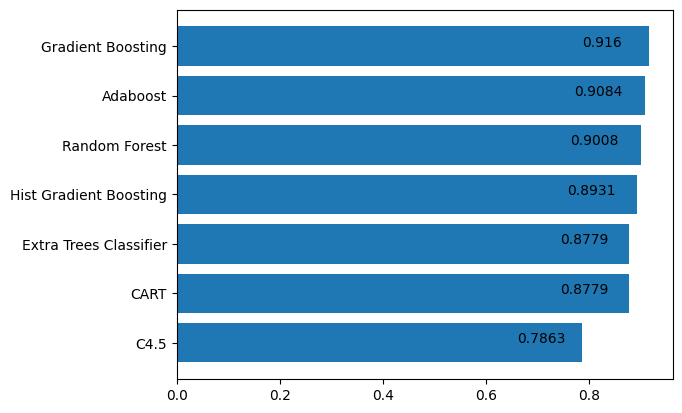

In [36]:
plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame(results)

df_sorted = df.sort_values('accuracy_score')

ax.barh('classifier', 'accuracy_score', data=df_sorted)
for i in range(len(results)):
    ax.text(results[i]['accuracy_score'] * 0.9, results[i]['classifier'], round(results[i]['accuracy_score'], 4), ha='center', color='black')
